<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. 

Задача — установить параметры, от которых зависит стоимость объекта.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).

Требуется разобраться:
 * влияет ли площадь, количество комнат и удаленность от центра на стоимость объекта
 * какие прочие параметры могут также оказывать влияние на стоимость объекта


**Ход исследования**

Данные об объявлениях содержатся в файле (Путь к файлу: /datasets/real_estate_data.csv). О качестве данных ничего не известно. Поэтому перед проверкой гипотез проведем обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки исправим самые критичные ошибки данных.
 
Таким образом, исследование содержит три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.


Результаты исследования будут учтены при построении автоматизированной системы: она отследит аномалии и мошенническую деятельность.

## Изучение данных из файла

In [894]:
from IPython.display import display
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [895]:
df = pd.read_csv('/datasets/real_estate_data.csv')

In [896]:
df.head(10) #печать первых 10 строк таблицы данных

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Для начала требуется разделить строку на колонки.

In [897]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #Прочитаем данные ещё раз с учётом разделителя столбцов
df.head(10) #печать первых 10 строк таблицы данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Общая информация о таблице:

In [898]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итого: 23699 строк. Тип данных - int64 (целые числа), float64	(числа с плавающей точкой), object(текстовые или смешанные числовые и нечисловые значения), bool(логический типа данных).

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении



### Вывод


В каждой строке таблицы - данные об объявлении о продаже объекта недвижимости.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, заметно расхождение типов данных с предусловиями документации.

Чтобы двигаться дальше, устраним проблемы в данных.

## Предобработка данных
- исключим пропуски
- проверим данные на дубликаты и аномалии
- проверим правильность типов данных

###  Заполнение пропусков

Количество значений в некоторых столбцах различается от общего числа строк. Значит, в данных есть пропущенные значения.

Проверим количество пропущенных значений по всей таблице:

In [899]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Начнем со столбца *'ceiling_height' (высота потолка)*. Просмотрим его уникальные названия в порядке возрастания:

In [900]:
display(sorted(df['ceiling_height'].unique())) 


[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


В глаза бросаются несколько значений - nan,значения до 2,5 м и значения свыше 6 м (6м например возможно в двухуровневых квартирах). Обработаем пропуски nan в данных по высоте потолка. Для этого посмотрим среднее и медианное значение высоты потолка:

In [901]:
print(df['ceiling_height'].mean())
print(df['ceiling_height'].median())


2.77149889685604
2.65


In [902]:
ceiling_height_median = df['ceiling_height'].median()#Для заполнения пропусков в нашем случае логичнее использовать именно 
#медианные значения, тк из перечня уникальных значений видно, что велика разница минимальнойго и максимального значения
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)


Проверим, сколько значений "до 2,5 м и свыше 8м" встречается в данных:

In [903]:
display(df.groupby('ceiling_height')['ceiling_height'].count().head(15))
display(df.groupby('ceiling_height')['ceiling_height'].count().tail(15))

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
2.25       1
2.30       4
2.34       1
2.40      23
2.45      15
2.46       2
2.47       3
2.48       8
2.49       1
2.50    3515
Name: ceiling_height, dtype: int64

ceiling_height
5.8      1
6.0      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

Ошибочные значение, которые можно удалить. Ведь высоту потолков в многоквартирных домах стандартной застройки 5.8 СНиП 31-01-2003 (минимальная высота - 2,5м). При этом данным СНиП не регламентируется максимальная высота потолков. Природа ошибки не понятна, но доля таких объявлений мала. Исключение не повлияет на ход исследования.

In [904]:
df=df.query('ceiling_height>=2.5 and ceiling_height<=6')
display(sorted(df['ceiling_height'].unique()))#проверим результат удаления

[2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.14,
 4.15,
 4.19,
 4.2,
 4.25,
 4.3,
 4.37,
 4.4,
 4.45,
 4.5,
 4.65,

Следующие небольшие (!!!) пропуски наблюдаются в столбцах *'floors_total', 'locality_name'*. Проверим долю таких  пропусков во всех данных:

In [905]:
print('Доля пропущенных значений в столбце общего количества этажей:', 
      df['floors_total'].isna().sum()/df['floor'].count()*100,'%')

print('Доля пропущенных значений в столбце названия населенного пункта:', 
      df['locality_name'].isna().sum()/df['floor'].count()*100,'%')

Доля пропущенных значений в столбце общего количества этажей: 0.3644531084459889 %
Доля пропущенных значений в столбце названия населенного пункта: 0.20765351527736575 %


In [906]:
df=df.dropna(subset=['floors_total','locality_name'])#доля прпусков мала, поэтому удалим их
print(df.isna().sum())#проверим результат

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1859
floor                       0
is_apartment            20728
studio                      0
open_plan                   0
kitchen_area             2209
balcony                 11436
locality_name               0
airports_nearest         5483
cityCenters_nearest      5460
parks_around3000         5459
parks_nearest           15468
ponds_around3000         5459
ponds_nearest           14458
days_exposition          3155
dtype: int64


Проверим уникальные значения в данных по столбцу *'balcony'*:

In [907]:
display(sorted(df['balcony'].unique()))#проверим результат замены

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

Пропуски nan в данных по количеству балконов можно объяснить как отсутствие балкона в объекте недвижимости. Заполним пропуски значением 0:

In [908]:
df['balcony'] = df['balcony'].fillna(0)
display(df.groupby('balcony')['balcony'].count().head())#проверим уникальные значения

balcony
0.0    15110
1.0     4157
2.0     3637
3.0       79
4.0      181
Name: balcony, dtype: int64

Встречаются значения балконов - 3 и 4. И опять же доля таких значений в сумме менее 1% от данных. Поэтому удалим такие строки,т.к. это явно выбивающиеся значения, относящиеся к целым домам,а не квартирам.

In [909]:
#df=df.query('ceiling_height!=3 and ceiling_height!=4') #НЕВЕРНО БЫЛО, надо балконы же убрать!
df=df.query('balcony!=3 and balcony!=4') #ВОТ ТАК

print(df.isna().sum())#проверим результат

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1846
floor                       0
is_apartment            20524
studio                      0
open_plan                   0
kitchen_area             2200
balcony                     0
locality_name               0
airports_nearest         5425
cityCenters_nearest      5402
parks_around3000         5401
parks_nearest           15322
ponds_around3000         5401
ponds_nearest           14308
days_exposition          3108
dtype: int64


Касаемо пропусков в столбцах *'airports_nearest' и 'cityCenters_nearest'*  будем считать, что могли произойти сбои в системе геоопределения. И логичнее на данном этапе пропуски оставить.

 Пропуски в столбце *'parks_around3000'* составляют 25% от всех строк. Посмотрим, какие значения и в каком количестве присутсвуют в данных:

In [845]:
display(df.groupby('parks_around3000')['parks_around3000'].count())

parks_around3000
0.0    9925
1.0    5541
2.0    1704
3.0     632
Name: parks_around3000, dtype: int64

Таким образом, можно утверждать, что при заполнении объявления на продажу объекта неуказание количества парков можкт быть свзяано как с их отсутствием в радиусе 3 км от объекта недвижимости, так и с отсутствием у продавца такой информации. Пропуск оставляем. В дальнейшем посмотрим, на влияние этого параметра. 

Так же проверим столбцы *'parks_nearest','ponds_around3000','ponds_nearest'*. Доля пропусков в них велика. Посмотрим, какие значения и в каком количестве присутсвуют в данных:

In [910]:
display(df.groupby('parks_nearest')['parks_nearest'].count())
display(df.groupby('ponds_around3000')['ponds_nearest'].count())
display(df.groupby('ponds_nearest')['ponds_nearest'].count())

parks_nearest
1.0       1
3.0       1
4.0       1
7.0       1
9.0       2
         ..
2905.0    1
2984.0    1
3013.0    1
3064.0    1
3190.0    2
Name: parks_nearest, Length: 993, dtype: int64

ponds_around3000
0.0       0
1.0    5580
2.0    1857
3.0    1458
Name: ponds_nearest, dtype: int64

ponds_nearest
13.0      2
16.0      8
19.0      4
20.0      5
22.0      7
         ..
1299.0    1
1313.0    1
1337.0    1
1341.0    2
1344.0    1
Name: ponds_nearest, Length: 1096, dtype: int64

Так же можно утверждать, что при заполнении объявления на продажу объекта неуказание данных по этим параметрам може быть связано как с их отсутствием поблизости, так и с отсутствием у продавца такой информации. Пропуски оставляем. В дальнейшем посмотрим, на влияние этого параметра. 

In [911]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1846
floor                       0
is_apartment            20524
studio                      0
open_plan                   0
kitchen_area             2200
balcony                     0
locality_name               0
airports_nearest         5425
cityCenters_nearest      5402
parks_around3000         5401
parks_nearest           15322
ponds_around3000         5401
ponds_nearest           14308
days_exposition          3108
dtype: int64


Остались пропуски по количеству дней публикации *'days_exposition'*. Логично заключить, что пропуски могут быть связаны с дейстующими по настоящий день объявлениями, т.е. объекты еще находятся в продаже. Поэтому пропуски в данном столбце оставим неизменными.


In [912]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1846
floor                       0
is_apartment            20524
studio                      0
open_plan                   0
kitchen_area             2200
balcony                     0
locality_name               0
airports_nearest         5425
cityCenters_nearest      5402
parks_around3000         5401
parks_nearest           15322
ponds_around3000         5401
ponds_nearest           14308
days_exposition          3108
dtype: int64


Пропуски по булевым столбцам (у соответствии с описанием данных) также оставляем без изменения!!! Это столбцы *'is_apartment', 'studio', 'open_plan'*. 

In [913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23203 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23203 non-null  int64  
 1   last_price            23203 non-null  float64
 2   total_area            23203 non-null  float64
 3   first_day_exposition  23203 non-null  object 
 4   rooms                 23203 non-null  int64  
 5   ceiling_height        23203 non-null  float64
 6   floors_total          23203 non-null  float64
 7   living_area           21357 non-null  float64
 8   floor                 23203 non-null  int64  
 9   is_apartment          2679 non-null   object 
 10  studio                23203 non-null  bool   
 11  open_plan             23203 non-null  bool   
 12  kitchen_area          21003 non-null  float64
 13  balcony               23203 non-null  float64
 14  locality_name         23203 non-null  object 
 15  airports_nearest   

Из описания данных понятно, что столбец first_day_exposition должен иметь формат данных даты (вместо указанного в общей информации - object). Изменим формат данных на верный:

In [914]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition']).dt.date#при этом убираем часть со временем, 
#она не влияет
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%d')
df.info()#проверим


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23203 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23203 non-null  int64         
 1   last_price            23203 non-null  float64       
 2   total_area            23203 non-null  float64       
 3   first_day_exposition  23203 non-null  datetime64[ns]
 4   rooms                 23203 non-null  int64         
 5   ceiling_height        23203 non-null  float64       
 6   floors_total          23203 non-null  float64       
 7   living_area           21357 non-null  float64       
 8   floor                 23203 non-null  int64         
 9   is_apartment          2679 non-null   object        
 10  studio                23203 non-null  bool          
 11  open_plan             23203 non-null  bool          
 12  kitchen_area          21003 non-null  float64       
 13  balcony         

Пропуски в столбце 'is_apartment' заполним значением False, тк чаще всего среди объектов недвижимости встречаются квартиры (апартаменты являются коммерческой недвижимостью!):

In [915]:
df['is_apartment'] = df['is_apartment'].fillna(False)

df['is_apartment']= df['is_apartment'].astype('bool')#изменим тип данных в соответствии с описанием параметров!


In [916]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1846
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2200
balcony                     0
locality_name               0
airports_nearest         5425
cityCenters_nearest      5402
parks_around3000         5401
parks_nearest           15322
ponds_around3000         5401
ponds_nearest           14308
days_exposition          3108
dtype: int64


Пропуски в столбцах *'living_area', 'kitchen_area'* правильнее оставить без изменения, тк адекватной замены для них нет. А удаление строк с такими прпусками может сильно исказить результат исследования. Природа пропусков не ясна, т.к. в объвлениях это одни из главных параметров объектов недвижимости.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу данных столбец с ценой за квадратный метр:

In [917]:
df['price_square_meter'] = (df['last_price']/df['total_area']).astype('int')#считаем цену за квадратный метр, 
#с обращением резульата в целое число для упрощения восприятия информации/ добавляем в таблицу
                                      

Добавим в таблицу данных столбцы с данными о годе,месяце и дне недели публикации объявления:

In [918]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month 
df['week_day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday 

In [919]:
df.head(5)#выведем результат для проверки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,year,month,week_day
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,2018,6,1


Проверим уникальные значения по столбцу *'floor'* и частоту их встречи:

In [920]:
display(df.groupby('floor')['floor'].count())


floor
1     2885
2     3303
3     3019
4     2740
5     2566
6     1271
7     1192
8     1050
9     1030
10     677
11     509
12     511
13     372
14     330
15     330
16     311
17     222
18     172
19     141
20     106
21     118
22     108
23      98
24      57
25      45
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

Можно утверждать, что для покупателей важно, чтоб объект не находился на первом или последнем этажи. Такой выбор всега редкий. Поэтому выделим категории этажноси (Первый, Последний, Другие) в отдельный столбец таблицы:

In [921]:
df.loc[df['floor'] ==df['floors_total'], 'floor_group'] = 'Последний'
df.loc[df['floor'] ==1, 'floor_group'] = 'Первый'
df['floor_group'] = df['floor_group'].where(df['floor_group'].isin(['Первый','Последний']),'Другие')

display(df.head(20))#проверим работу группировок


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,year,month,week_day,floor_group
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,2019,3,3,Другие
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,2018,12,1,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,2015,8,3,Другие
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176,2015,7,4,Другие
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,2018,6,1,Другие
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065,2018,9,0,Другие
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195,2017,11,3,Другие
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,0.0,NaN,0.0,NaN,NaN,110544,2019,4,3,Другие
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454,2018,5,2,Другие
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524,2017,2,6,Другие


Дополнительно добавим солбцы отношения жилой и кухонной площадей к общей площади (столбцы также будут иметь пропуски в данных):

In [922]:
df['ratio_living_area']= df['living_area']/df['total_area']

df['ratio_kitchen_area'] = df['kitchen_area']/df['total_area']
df.head()#проверим


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,year,month,week_day,floor_group,ratio_living_area,ratio_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370,2019,3,3,Другие,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81.0,82920,2018,12,1,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,92785,2015,8,3,Другие,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,3.0,234.0,424.0,408176,2015,7,4,Другие,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000,2018,6,1,Другие,0.320000,0.410000


Теперь таблица данных готова для анализа.

In [923]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23203 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23203 non-null  int64         
 1   last_price            23203 non-null  float64       
 2   total_area            23203 non-null  float64       
 3   first_day_exposition  23203 non-null  datetime64[ns]
 4   rooms                 23203 non-null  int64         
 5   ceiling_height        23203 non-null  float64       
 6   floors_total          23203 non-null  float64       
 7   living_area           21357 non-null  float64       
 8   floor                 23203 non-null  int64         
 9   is_apartment          23203 non-null  bool          
 10  studio                23203 non-null  bool          
 11  open_plan             23203 non-null  bool          
 12  kitchen_area          21003 non-null  float64       
 13  balcony         

## Исследовательский анализ данных

Посмотрим сведения о столбце *'total_area'* и построим распределение числа объявлений по этому параметру:

In [924]:
print(df['total_area'].describe())

count    23203.000000
mean        60.108223
std         35.570345
min         12.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

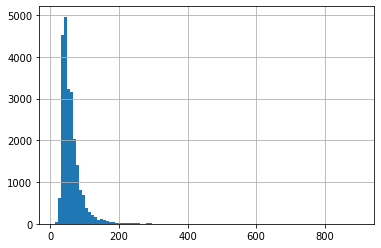

In [925]:
pd.Series(df['total_area']).hist(range = (12,900),bins=100)#построим гистограмму с предельными значениями из describe

Из гистограммы видно, что распредление имеет правильный вид. Но при этом значения площади от 200 до 900 не очевидны. Построим диаграмму размаха:

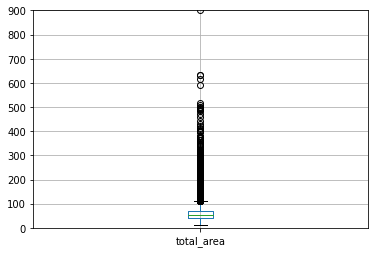

In [926]:
plt.ylim(0,900)
plt.xlim(0,2)
df.boxplot(column=['total_area'])
plt.show()

Видно, что большая часть значений лежит до 150 кв.м.Поэтому построим гистограмму с новыми предельными значениями, отбросив значения свыше 150:

<AxesSubplot:>

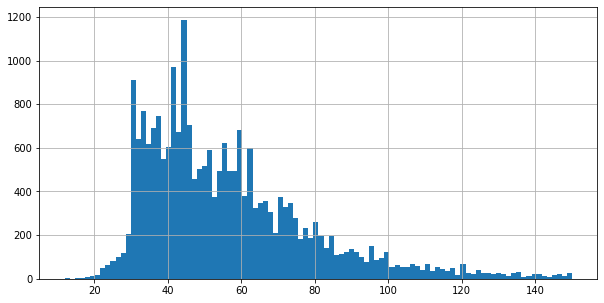

In [927]:
pd.Series(df['total_area']).hist(range = (12,150),bins=100,figsize=(10,5))

Из гистограммы видно, что большое количество объявлений приходится на площадь от 30 до 80 кв.м.

In [928]:
df=df.query('total_area < 150')#ограничим выбор объектов площадью до 150 кв.м
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22638 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22638 non-null  int64         
 1   last_price            22638 non-null  float64       
 2   total_area            22638 non-null  float64       
 3   first_day_exposition  22638 non-null  datetime64[ns]
 4   rooms                 22638 non-null  int64         
 5   ceiling_height        22638 non-null  float64       
 6   floors_total          22638 non-null  float64       
 7   living_area           20858 non-null  float64       
 8   floor                 22638 non-null  int64         
 9   is_apartment          22638 non-null  bool          
 10  studio                22638 non-null  bool          
 11  open_plan             22638 non-null  bool          
 12  kitchen_area          20507 non-null  float64       
 13  balcony         

**Видно, что мы убрали примерно 2,5% объявлений таким ограничением**

Посмотрим сведения о столбце *'last_price'* и построим распределение числа объявлений по этому параметру:

In [929]:
print(df['last_price'].describe())

count    2.263800e+04
mean     5.655609e+06
std      4.465969e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.240000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

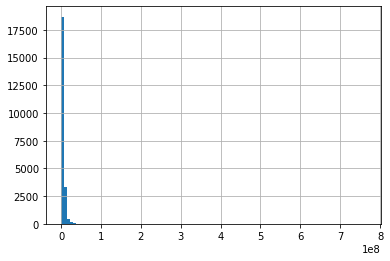

In [930]:
pd.Series(df['last_price']).hist(range = (1.219000e+04,7.630000e+08),bins=100)#построим гистограмму с предельными значениями из describe

Из гистограммы видно, что распредление имеет более-менее правильный вид. Но при этом значения стоимости свыше 15 000 000 руб не очевидны. Построим диаграмму размаха. Но посмотрим предварительно уникальные значения цены и на всякий случай частоту их встреч:

In [931]:
display(df.groupby('last_price')['last_price'].count())

last_price
12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
77349000.0     1
82000000.0     1
85000000.0     1
122000000.0    1
124000000.0    1
Name: last_price, Length: 2680, dtype: int64

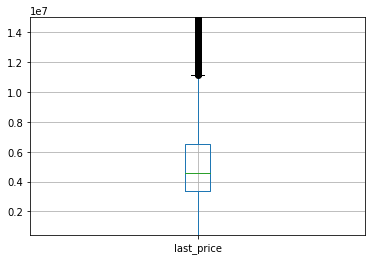

In [932]:
plt.ylim(430000,15000000)#выбираем значения исходя из гистограммы и уникальных значений, чтобы диаграмма размаха была читабельной!!!
plt.xlim(0,2)
df.boxplot(column=['last_price'])
plt.show()

Видно, что большая часть значений лежит до 15 млн руб.Поэтому построим гистограмму с новыми предельными значениями, отбросив значения до 430 000 и более 11 000 000 руб:

<AxesSubplot:>

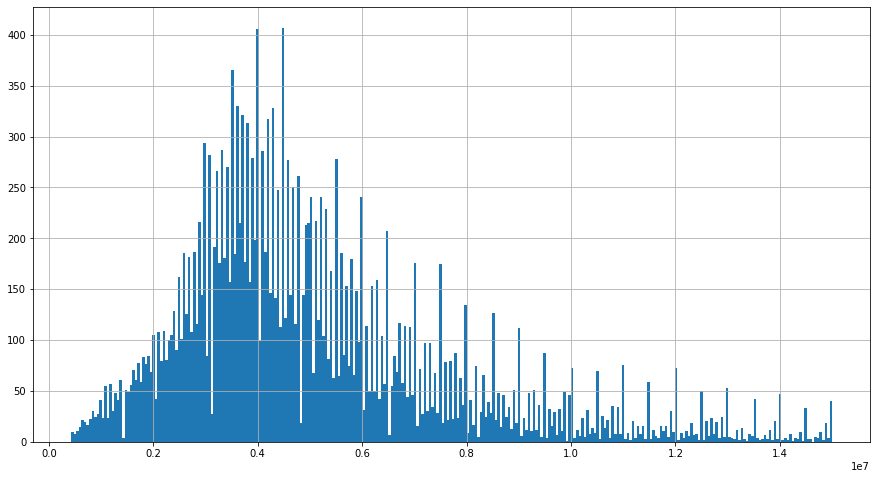

In [933]:
pd.Series(df['last_price']).hist(range = (430000,15000000),bins=300, figsize=(15,8))


Из гистограммы видно, что большое количество объявлений приходится на объекты стоимостью 1,5-8 млн руб (1 продажа раз в 3 дня и чаще,например).

In [934]:
df=df.query('last_price < 15000000')#ограничим выбор объектов ценой до 15 млн.руб.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21927 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21927 non-null  int64         
 1   last_price            21927 non-null  float64       
 2   total_area            21927 non-null  float64       
 3   first_day_exposition  21927 non-null  datetime64[ns]
 4   rooms                 21927 non-null  int64         
 5   ceiling_height        21927 non-null  float64       
 6   floors_total          21927 non-null  float64       
 7   living_area           20227 non-null  float64       
 8   floor                 21927 non-null  int64         
 9   is_apartment          21927 non-null  bool          
 10  studio                21927 non-null  bool          
 11  open_plan             21927 non-null  bool          
 12  kitchen_area          19862 non-null  float64       
 13  balcony         

**Видно, что мы потеряли примерно 2,8% объявлений таким ограничением**

Посмотрим сведения о столбце *'rooms'* и построим распределение числа объявлений по этому параметру:

In [935]:
print(df['rooms'].describe())

count    21927.000000
mean         1.958043
std          0.928420
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


In [936]:
display(df.groupby('rooms')['rooms'].count().head(35))#дополнительно проверим частоту встреч значения параметра

rooms
0     191
1    7937
2    7600
3    5192
4     838
5     147
6      20
7       2
Name: rooms, dtype: int64

<AxesSubplot:>

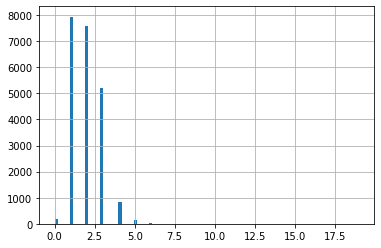

In [937]:
pd.Series(df['rooms']).hist(range = (0,19),bins=100)
#построим гистограмму с предельными значениями из describe

Из гистограммы видно, что распредление имеет более-менее правильный вид. Но при этом значения комнат свыше 6 не очевидны. Построим диаграмму размаха. 

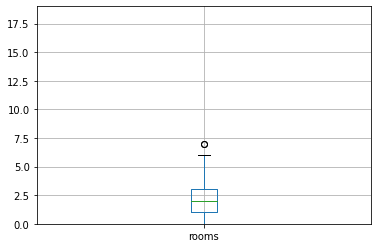

In [938]:
plt.ylim(0,19)
plt.xlim(0,2)
df.boxplot(column=['rooms'])
plt.show()

Видно, что большая часть значений лежит до 6.Поэтому построим гистограмму с новыми предельными значениями, отбросив значения до свыше 6 комнат:

<AxesSubplot:>

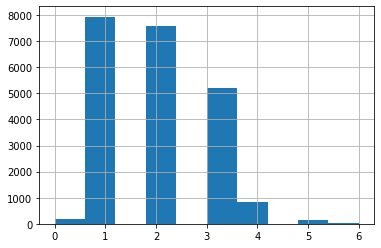

In [939]:
pd.Series(df['rooms']).hist(range = (0,6),bins=10)


Из гистограммы видно, что большое количество объявлений приходится на объекты с 1-3 комнатами.

In [940]:
df=df.query('rooms < 4')#ограничим выбор на объектах с максимум 4 комнатами.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20920 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20920 non-null  int64         
 1   last_price            20920 non-null  float64       
 2   total_area            20920 non-null  float64       
 3   first_day_exposition  20920 non-null  datetime64[ns]
 4   rooms                 20920 non-null  int64         
 5   ceiling_height        20920 non-null  float64       
 6   floors_total          20920 non-null  float64       
 7   living_area           19293 non-null  float64       
 8   floor                 20920 non-null  int64         
 9   is_apartment          20920 non-null  bool          
 10  studio                20920 non-null  bool          
 11  open_plan             20920 non-null  bool          
 12  kitchen_area          18945 non-null  float64       
 13  balcony         

**Видно, что мы потеряли примерно 4,5% объявлений таким ограничением**

Посмотрим сведения о столбце *'ceiling_height'* и построим распределение числа объявлений по этому параметру:

In [941]:
print(df['ceiling_height'].describe())

count    20920.000000
mean         2.674480
std          0.181018
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64


In [942]:
display(df.groupby('ceiling_height')['ceiling_height'].count().head(55))
display(df.groupby('ceiling_height')['ceiling_height'].count().tail(55))

#дополнительно проверим частоту встреч значения параметра

ceiling_height
2.50    3331
2.51      34
2.52      76
2.53      64
2.54      80
2.55     932
2.56     130
2.57      96
2.58      57
2.59      13
2.60    1545
2.61       5
2.62      12
2.63      12
2.64      80
2.65    8945
2.66      16
2.67      33
2.68      23
2.69       2
2.70    1478
2.71      12
2.72      27
2.73      26
2.74      24
2.75     849
2.76      54
2.77      55
2.78      44
2.79      10
2.80     877
2.81       8
2.82      15
2.83      11
2.84      17
2.85      90
2.86       6
2.87       5
2.88      11
2.89       1
2.90     130
2.91       1
2.92       7
2.93       3
2.94       1
2.95      31
2.96       3
2.97       3
2.98       2
2.99       1
3.00     791
3.01       4
3.02       5
3.03       3
3.04       3
Name: ceiling_height, dtype: int64

ceiling_height
3.31     1
3.32     2
3.33     3
3.34     1
3.35     8
3.36     1
3.37     1
3.38     4
3.39     1
3.40    48
3.42     1
3.44     1
3.45     6
3.46     1
3.47     4
3.48     1
3.49     1
3.50    61
3.52     1
3.54     5
3.55    10
3.56     2
3.60    16
3.62     2
3.63     2
3.65     2
3.66     1
3.67     1
3.68     1
3.70    16
3.75     4
3.78     1
3.80    10
3.83     1
3.84     1
3.88     1
3.90     3
3.95     4
3.98     1
4.00    20
4.06     1
4.10     1
4.15     1
4.19     2
4.20     5
4.25     1
4.30     1
4.37     1
4.40     1
4.50     4
4.70     1
4.80     1
5.00     1
5.30     1
5.80     1
Name: ceiling_height, dtype: int64

<AxesSubplot:>

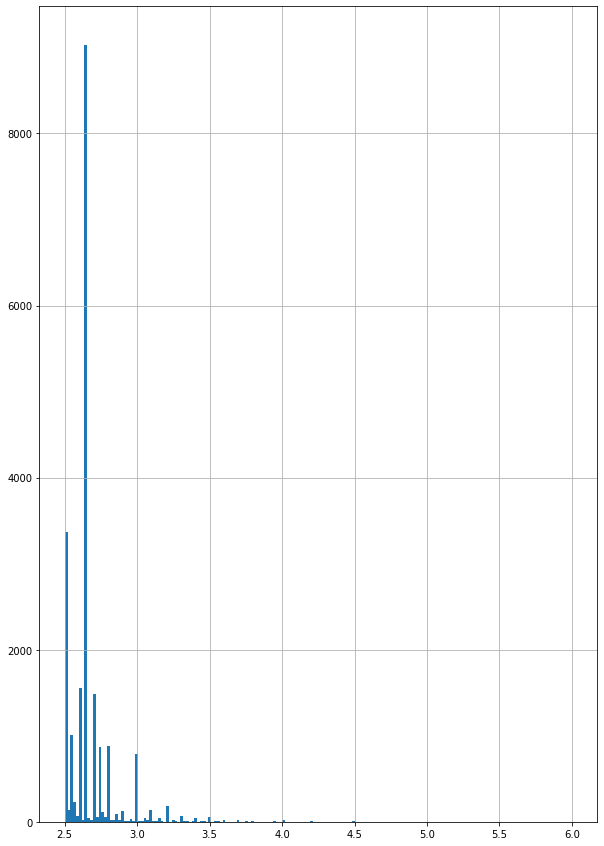

In [943]:
pd.Series(df['ceiling_height']).hist(range = (2.5,6),bins=180,figsize=(10,15))
#построим гистограмму с предельными значениями из describe

Из гистограммы видно, что распредление имеет более-менее правильный вид. Но при этом значения стоимости свыше 5 метров не очевидны. Построим диаграмму размаха. 

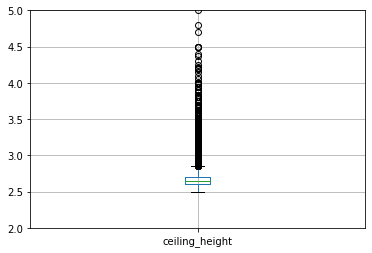

In [944]:
import matplotlib.pyplot as plt
plt.ylim(2,5)
plt.xlim(0,2)
df.boxplot(column=['ceiling_height'])
plt.show()

Видно, что большая часть значений лежит до 4.5.Поэтому построим гистограмму с новыми предельными значениями, отбросив значения свыше 4.5 метров:

<AxesSubplot:>

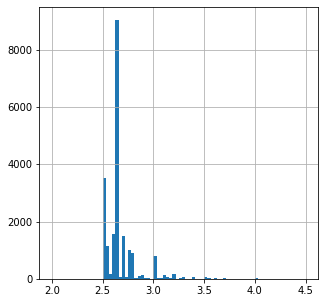

In [945]:
pd.Series(df['ceiling_height']).hist(range = (2,4.5),bins=80,figsize=(5,5))

Из гистограммы видно, что большое количество объявлений приходится на объекты с высотой потолков примерно 2,65м.

In [946]:
df=df.query('ceiling_height<4.5')#ограничим выбор на объектах с максимум 4 комнатами.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20911 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20911 non-null  int64         
 1   last_price            20911 non-null  float64       
 2   total_area            20911 non-null  float64       
 3   first_day_exposition  20911 non-null  datetime64[ns]
 4   rooms                 20911 non-null  int64         
 5   ceiling_height        20911 non-null  float64       
 6   floors_total          20911 non-null  float64       
 7   living_area           19286 non-null  float64       
 8   floor                 20911 non-null  int64         
 9   is_apartment          20911 non-null  bool          
 10  studio                20911 non-null  bool          
 11  open_plan             20911 non-null  bool          
 12  kitchen_area          18939 non-null  float64       
 13  balcony         

**Таким ограничением мы потеряли единичные объекты**

Посмотрим сведения о столбце *'days_exposition'* и построим распределение числа объявлений по этому параметру:

In [947]:
print(df['days_exposition'].describe())

count    18359.000000
mean       172.293807
std        211.073143
min          1.000000
25%         43.000000
50%         90.000000
75%        217.000000
max       1553.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

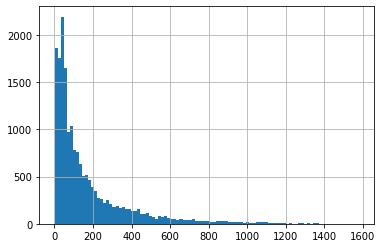

In [948]:
pd.Series(df['days_exposition']).hist(range = (1,1580),bins=100)

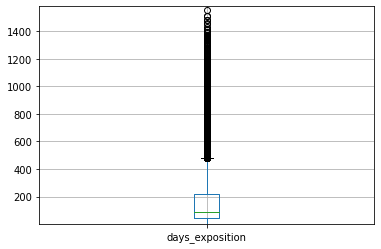

In [949]:
plt.ylim(2,1580)
plt.xlim(0,2)
df.boxplot(column=['days_exposition'])
plt.show()

Таким образом, судя по гистограмме времени продажи квартиры, большое количесвто продаж приходится на первые месяцы после размещения объявления.
Заметен огромный  пик в районе 80 дней (3 месяца), связанный с медианным значением 95 дней.Далее закономерно идет на спад. 
Однако на графике виден еще высокий пик около 0. Скорее всего, он имеет иную природу. Возможно ошибки в данных или выгодное соотношение цены-площади вызывает быстрый интерес к покупке такой недвижимости.
Продажи недвижимости спустя год с момента публикации объявления идут заметно хуже и закономерно стремятся к 0.

Из графика можно заключить, что обычно продажа занимает от 1 до 3 месяцев. Пик продаж приходится на срок в 3 месяца. И необычно долго идут продажи при сроках публикации объявления свыше года (при значении 365 можно увидеть 1 продажу в день, что вполне еще можно считать активным рынком).
**Однако, важно помнить, что у нас есть объекты, данные по которым НЕ содержат данных о количестве дней размещения!!! Такие объекты скорее всего относятся к активным (3000 с лишним пропусков!!!),  поэтому важно не проводить ограничения по срокам, ведь 15% данных могут сильно изменить нашу гистограмму по срокам объявления**

**При срезах данных произошла фильтрация объектов примерно на 10% (23200 строк в предобработанных данных против 20900 строк при фильтрации), что является допустимым для дальнейшего анализа**

In [950]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20911 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20911 non-null  int64         
 1   last_price            20911 non-null  float64       
 2   total_area            20911 non-null  float64       
 3   first_day_exposition  20911 non-null  datetime64[ns]
 4   rooms                 20911 non-null  int64         
 5   ceiling_height        20911 non-null  float64       
 6   floors_total          20911 non-null  float64       
 7   living_area           19286 non-null  float64       
 8   floor                 20911 non-null  int64         
 9   is_apartment          20911 non-null  bool          
 10  studio                20911 non-null  bool          
 11  open_plan             20911 non-null  bool          
 12  kitchen_area          18939 non-null  float64       
 13  balcony         

Получили срез на 20911 строк!

Проведем анализ стоимости объекта в зависимости от общей площади, количества комнат и удаленности от центра города. Для этого построим графики этих зависимостей.

У нас были пропуски по столбцу *'cityCenters_nearest'*. Проверим, какими данными заполнен столбец

In [952]:
display(sorted(df['cityCenters_nearest'].unique())) 

[208.0,
 287.0,
 399.0,
 467.0,
 472.0,
 515.0,
 583.0,
 671.0,
 730.0,
 743.0,
 801.0,
 830.0,
 835.0,
 853.0,
 936.0,
 964.0,
 996.0,
 1053.0,
 1090.0,
 1097.0,
 1166.0,
 1181.0,
 1211.0,
 1249.0,
 1276.0,
 1283.0,
 1292.0,
 1369.0,
 1381.0,
 1431.0,
 1509.0,
 1514.0,
 1572.0,
 1589.0,
 1592.0,
 1641.0,
 1754.0,
 1755.0,
 1796.0,
 1826.0,
 1862.0,
 1898.0,
 1921.0,
 1936.0,
 1949.0,
 1963.0,
 2004.0,
 2009.0,
 2056.0,
 2139.0,
 2142.0,
 2143.0,
 2144.0,
 2169.0,
 2229.0,
 2254.0,
 2267.0,
 2277.0,
 2282.0,
 2309.0,
 2318.0,
 2329.0,
 2336.0,
 2348.0,
 2357.0,
 2371.0,
 2404.0,
 2423.0,
 2427.0,
 2443.0,
 2446.0,
 2447.0,
 2485.0,
 2487.0,
 2552.0,
 2627.0,
 2648.0,
 2671.0,
 2723.0,
 2739.0,
 2758.0,
 2767.0,
 2802.0,
 2803.0,
 2807.0,
 2814.0,
 2838.0,
 2846.0,
 2879.0,
 2913.0,
 2990.0,
 3004.0,
 3062.0,
 3066.0,
 3075.0,
 3082.0,
 3084.0,
 3090.0,
 3106.0,
 3110.0,
 3167.0,
 3175.0,
 3220.0,
 3223.0,
 3224.0,
 3232.0,
 3233.0,
 3250.0,
 3254.0,
 3260.0,
 3269.0,
 3275.0,
 3286.0,


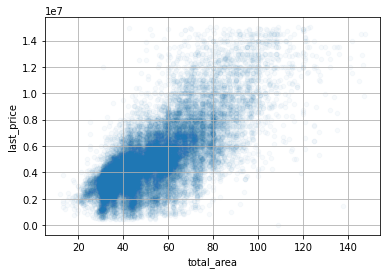

<AxesSubplot:xlabel='cityCenters_nearest_km'>

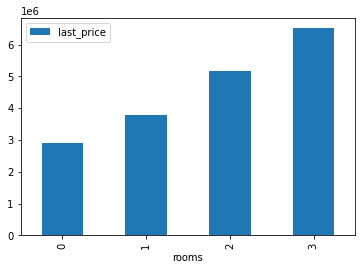

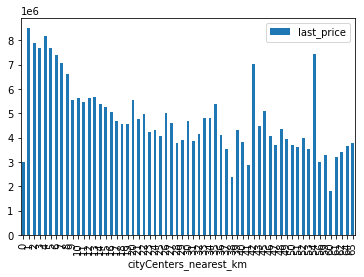

In [955]:
df.plot(x='total_area',y='last_price',kind='scatter',grid=True,alpha=0.03) #удобно посмотреть на диаграмму рассеяниня 
plt.show()


rooms_grouped = df.pivot_table(index='rooms', values='last_price', aggfunc=['mean'])
rooms_grouped.columns = ['last_price']
rooms_grouped.plot(y='last_price',kind='bar')#удобно использовать bar для нескольких целых значений rooms

df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)#можно заполнить пропуски 0,тк отсутствует в уник значениях

df['cityCenters_nearest_km'] = (df['cityCenters_nearest']/1000).astype('int')#добавим столбец с целочисленным расстоянием до центра в к
cityCenters_nearest_km_grouped = df.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean'])
cityCenters_nearest_km_grouped.columns = ['last_price']
cityCenters_nearest_km_grouped.plot(y='last_price',kind='bar')#удобно использовать bar для нескольких целых значений km

Из графиков видно, что стоимость объекта:
* растет закономерно и прямо пропорционально росту площади
* растет прямо пропорционально росту числа комнат
* умееьшается с увеличием расстояния от центра.

Дополнительно посчитаем коэффициенты Пирсона для связей:

In [956]:
location_stat_multi = df.pivot_table(index=df.index,values=['last_price','rooms','total_area','cityCenters_nearest_km'],aggfunc='mean')
print(location_stat_multi.corr())


                        cityCenters_nearest_km  last_price     rooms  \
cityCenters_nearest_km                1.000000    0.079145 -0.002370   
last_price                            0.079145    1.000000  0.431446   
rooms                                -0.002370    0.431446  1.000000   
total_area                           -0.012777    0.724881  0.778306   

                        total_area  
cityCenters_nearest_km   -0.012777  
last_price                0.724881  
rooms                     0.778306  
total_area                1.000000  


Самая высокая корреляция в 0.72 говорит о наличии связи между ценой и площадью, однако в нашем случае она не слишком сильная. Увеличение площади приводит к увеличению цены! Что аполне логично!

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом: 

<AxesSubplot:xlabel='floor_group'>

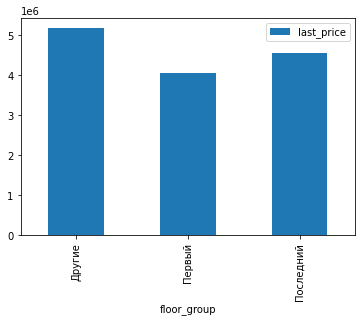

In [957]:
floor_grouped = df.pivot_table(index='floor_group', values='last_price', aggfunc=['mean'])
floor_grouped.columns = ['last_price']
floor_grouped.plot(y='last_price',kind='bar')

В соответствии с результатом можно утверждать, что стоимость объектов на первом и последних этажах снидена по сравнению с другими этажами. При этом стоимость объектов на последнем этаже будет выше, чем на первом.

Теперь изучим зависимость стоимости объекта от даты размещения: дня недели, месяца и года.

<AxesSubplot:xlabel='week_day'>

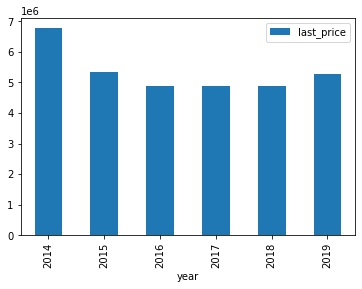

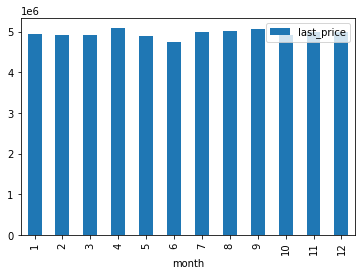

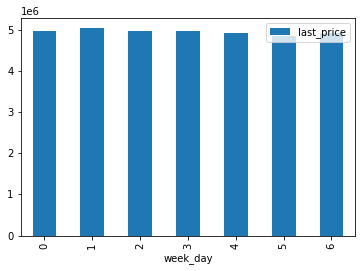

In [959]:
year_grouped = df.pivot_table(index='year', values='last_price', aggfunc=['mean'])
year_grouped.columns = ['last_price']
year_grouped.plot(y='last_price',kind='bar')

month_grouped = df.pivot_table(index='month', values='last_price', aggfunc=['mean'])
month_grouped.columns = ['last_price']
month_grouped.plot(y='last_price',kind='bar')

week_day_grouped = df.pivot_table(index='week_day', values='last_price', aggfunc=['mean'])
week_day_grouped.columns = ['last_price']
week_day_grouped.plot(y='last_price',kind='bar')


Анализ показывает, что стоимость объектов держится примерно на одном уровне 5 лет. При этом Нет четкого разграничения внутри года по месяцам. Касаемо дней недели вывод также очевиден - размещение объявления в тот или иной день недели никак не сказывается на уовне цены на объект.

Выберем 10 населённых пунктов с наибольшим числом объявлений:

In [960]:
df_locacity=df.groupby('locality_name')['locality_name'].count().sort_values().tail(10)

print(df_locacity)
pd.set_option('display.max_columns', None)


locality_name
Выборг                 216
Гатчина                295
деревня Кудрово        298
Колпино                309
посёлок Парголово      323
Пушкин                 326
Всеволожск             377
посёлок Шушары         424
посёлок Мурино         511
Санкт-Петербург      13399
Name: locality_name, dtype: int64


Определим среднюю цену квадратного метра в этих населённых пунктах и найдем населённые пункты с самой высокой и низкой стоимостью жилья:

In [961]:
good_locacity = df.query('locality_name in @df_locacity.index')#отбор интересующих нас населенных пунктов
locacity_stat = good_locacity.pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')
display(locacity_stat.sort_values(by='price_square_meter'))

,price_square_meter
locality_name,
Выборг,58487.157407
Всеволожск,67492.379310
Гатчина,68500.976271
Колпино,76022.822006
посёлок Шушары,78685.870283
посёлок Мурино,85899.138943
посёлок Парголово,90524.928793
деревня Кудрово,92430.708054
Пушкин,101254.558282


 Населенные пункты с самой высокой и низкой стоимостью жилья - Санкт-Петербург и Выборг соответственно!

Расммотрим объекты, расположенные в Санкт-Петербурге.

In [962]:
df_locacity_spb = df.query('locality_name=="Санкт-Петербург"').reset_index()

Посчитаем среднюю цену объектов в зависимости от удаленности от центра (для каждого км) и построим график, который покажет, как цена зависит от удалённости от центра:

<AxesSubplot:xlabel='cityCenters_nearest_km'>

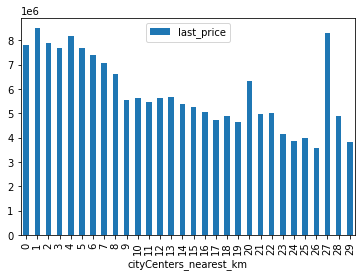

In [963]:
df_locacity_spb_price_km = df_locacity_spb.pivot_table(index='cityCenters_nearest_km',values='last_price', aggfunc=['mean'])
#df_locacity_spb_price_km['cityCenters_nearest_km']=df_locacity_spb_price_km.index
df_locacity_spb_price_km.columns=['last_price']
df_locacity_spb_price_km.plot(y='last_price',kind='bar')

Из графика видно, что в пределаз 3-5 км от центра цена приблизительно оинаковая. Далее цена на объекты начинает падать, что логично для удаленности объектов от центра города. **Обязательно стоит иметь в виду, что объекты на значении 0 - неинформативная полоса (тк это просто заполненные пропуски)**

Так же стоит заметить, что имеются пики по стоимости на расстоянии 20 и 28 км от центра города. Это может быть связано с объектами, расположенными, например, в интересных новых загородных комплексах коттеджного типа.

Выделим сегмент квартир в центре и проанализзируем следующие параметры: площадь, цена, число комнат, высота потолков (как делали это для всех объектов базы). 

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [964]:
df_locacity_spb_centre=df_locacity_spb.query('cityCenters_nearest_km<=5')

<AxesSubplot:>

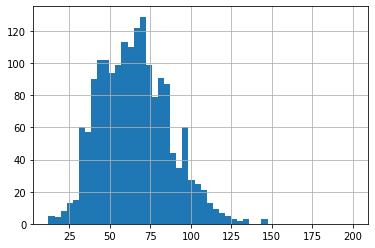

In [965]:
pd.Series(df_locacity_spb_centre['total_area']).hist(range = (12,200),bins=50)

<AxesSubplot:>

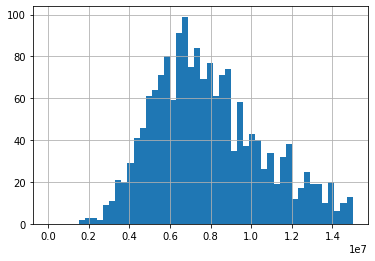

In [966]:
pd.Series(df_locacity_spb_centre['last_price']).hist(range = (12190,15000000),bins=50)

<AxesSubplot:>

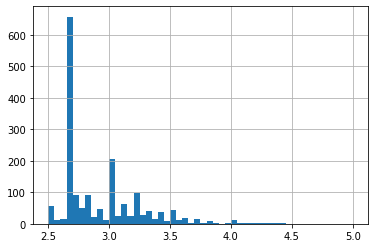

In [967]:
pd.Series(df_locacity_spb_centre['ceiling_height']).hist(range = (2.5,5),bins=50)

<AxesSubplot:>

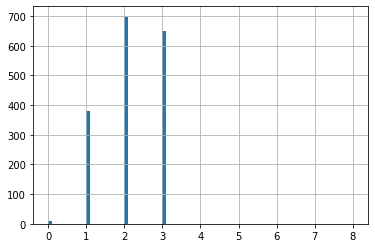

In [968]:
pd.Series(df_locacity_spb_centre['rooms']).hist(range = (0,8),bins=80)


Из гистограмм видно, что: 

* большое количество объявлений приходится на объекты с высотой потолков примерно 2,65м
* большое количество объявлений приходится на объекты с 1-3 комнатами
* большое количество объявлений приходится на объекты стоимостью 4-10 млн руб 
* большое количество объявлений приходится на площадь от 30 до 80 кв.м.

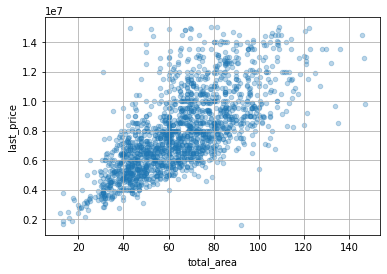

<AxesSubplot:xlabel='cityCenters_nearest_km'>

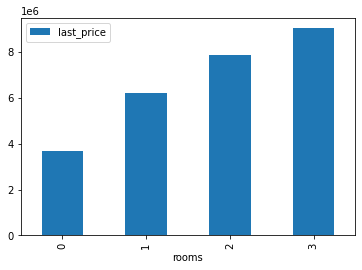

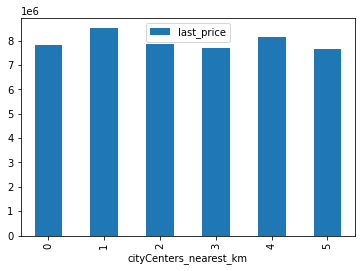

In [969]:
#df_locacity_spb_centre['id']=df_locacity_spb_centre.index
#station_stat_multi = df_locacity_spb_centre.pivot_table(index='id',values=['last_price','rooms','total_area','cityCenters_nearest'])
#print(station_stat_multi.corr())
#pd.plotting.scatter_matrix(station_stat_multi,figsize=(9,9))

#import matplotlib.pyplot as plt

df_locacity_spb_centre.plot(x='total_area',y='last_price',kind='scatter',grid=True,alpha=0.3) #удобно посмотреть на диаграмму рассеяниня 
plt.show()


rooms_grouped_spb = df_locacity_spb_centre.pivot_table(index='rooms', values='last_price', aggfunc=['mean'])
rooms_grouped_spb.columns = ['last_price']
rooms_grouped_spb.plot(y='last_price',kind='bar')#удобно использовать bar для нескольких целых значений rooms


cityCenters_nearest_km_grouped_spb = df_locacity_spb_centre.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean'])
cityCenters_nearest_km_grouped_spb.columns = ['last_price']
cityCenters_nearest_km_grouped_spb.plot(y='last_price',kind='bar')#удобно использовать bar для нескольких целых значений km

Из графиков видно, что стоимость объекта:
* растет закономерно и прямо пропорционально росту площади
* растет прямо пропорционально росту числа комнат
* остается примерно на одном уровне в радиусе 5 км от центра.

In [974]:
spb_stat_multi = df_locacity_spb_centre.pivot_table(index=df_locacity_spb_centre.index,values=['last_price','rooms','total_area','cityCenters_nearest_km'],aggfunc='mean')
print(spb_stat_multi.corr())

                        cityCenters_nearest_km  last_price     rooms  \
cityCenters_nearest_km                1.000000   -0.032668 -0.076724   
last_price                           -0.032668    1.000000  0.404265   
rooms                                -0.076724    0.404265  1.000000   
total_area                           -0.072311    0.692077  0.711453   

                        total_area  
cityCenters_nearest_km   -0.072311  
last_price                0.692077  
rooms                     0.711453  
total_area                1.000000  


Видно зависимость цены только от общей площади объекта!

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом: 

<AxesSubplot:xlabel='floor_group'>

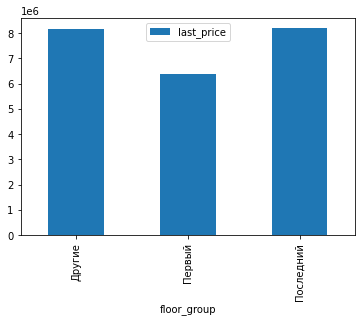

In [977]:
floor_grouped_spb = df_locacity_spb_centre.pivot_table(index='floor_group', values='last_price', aggfunc=['mean'])
floor_grouped_spb.columns = ['last_price']
floor_grouped_spb.plot(y='last_price',kind='bar')

В соответствии с результатом можно утверждать, что стоимость объектов на первом этаже снижена по сравнению с другими этажами. При этом стоимость объектов на последнем этаже приближается к стоимости объектов на прочих этажах. Это может быть связано с тем, что мы рассматриваем центр Санкт-Петербурга, поэтому расположением объекта нп последнем этаже в данном случае может даже являться преимуществом.

Теперь изучим зависимость стоимости объекта от даты размещения: дня недели, месяца и года.

<AxesSubplot:xlabel='week_day'>

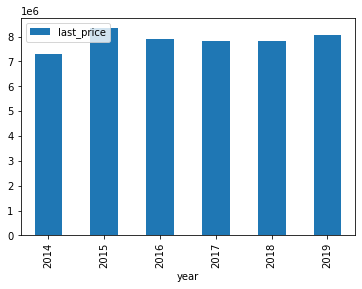

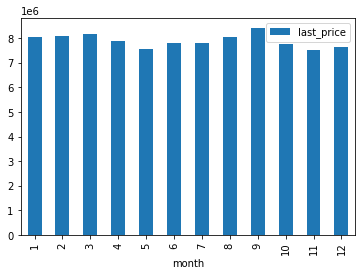

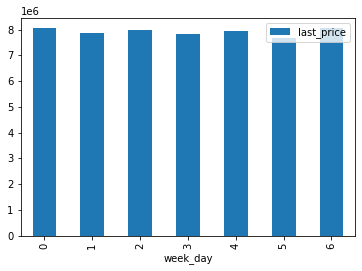

In [978]:
year_grouped_spb = df_locacity_spb_centre.pivot_table(index='year', values='last_price', aggfunc=['mean'])
year_grouped_spb.columns = ['last_price']
year_grouped_spb.plot(y='last_price',kind='bar')

month_grouped_spb = df_locacity_spb_centre.pivot_table(index='month', values='last_price', aggfunc=['mean'])
month_grouped_spb.columns = ['last_price']
month_grouped_spb.plot(y='last_price',kind='bar')

week_day_grouped_spb = df_locacity_spb_centre.pivot_table(index='week_day', values='last_price', aggfunc=['mean'])
week_day_grouped_spb.columns = ['last_price']
week_day_grouped_spb.plot(y='last_price',kind='bar')

Анализ показывает, что стоимость объектов держится примерно на одном уровне 5 лет. При этом Нет четкого разграничения внутри года по месяцам. Касаемо дней недели вывод также очевиден - размещение объявления в тот или иной день недели никак не сказывается на уовне цены на объект.

## Общий вывод

Согласно представленным входным данным проведен анализ базы объявлений объектов недвижимости. 

Для начала был выявлен ряд несоответствий, пропуски данных, неверные значения, тип данных и тд. Такие моменты были устранены. 

Далее проверили несколько гипотез и установили:

1. Для СПб и регионов:
* большое количество объявлений приходится на объекты с высотой потолков примерно 2,65м
* большое количество объявлений приходится на объекты с 1-3 комнатами
* большое количество объявлений приходится на объекты стоимостью 3-9 млн руб 
* большое количество объявлений приходится на площадь от 30 до 80 кв.м.

2. Также большое количесвто продаж приходится на первые месяцы после размещения объявления.Далее закономерно идет на спад (но имеется пик продаж в районе 80 дней - требуется отдельный анализ ждля этого). Высокий пик около 0 скорее всего имеет иную природу. Возможно ошибки в данных или выгодное соотношение цены-площади вызывает быстрый интерес к покупке такой недвижимости. Продажи недвижимости спустя год с момента публикации объявления идут заметно хуже и закономерно стремятся к 0.

3. Для всех объявлений стоимость объекта:
* растет закономерно и прямо пропорционально росту площади
* растет прямо пропорционально росту числа комнат
* уменьшается с увеличием расстояния от центра.

4. Для Санкт-Петербурга в отдельности стоимость объекта:
* растет закономерно и прямо пропорционально росту площади
* растет прямо пропорционально росту числа комнат
* остается примерно на одном уровне в радиусе 5 км от центра.

5. Анализ показывает, что стоимость объектов держится примерно на одном уровне 5 лет. При этом Нет четкого разграничения внутри года по месяцам. Касаемо дней недели вывод также очевиден - размещение объявления в тот или иной день недели никак не сказывается на уовне цены на объект.



Заказчику рекомендуется обращать внимание на зависимость цены от площади (соответственно и количества комнат) и расстояния от центра города. И иметь в виду, что объявления, которые не будут соответствовать таким выводам можно подвергать фильтру аномалий или мошенничества.



Дополнительно стоит отметить, что анализ проводился на узком (но самом основном!) перечне факторов, влияющих на стоимость. Отдельно можно рассмотреть аномалии в графиках (выявленные пики, пропуски в данных по площади объектов и тд), дополнительные факторы (наличие парков, прудов